# Leveraging Machine Learning to Optimize Real Estate Valuation in King County

The real estate industry is a complicated and crucial component of the economy, with far-reaching consequences for a wide range of players, including house buyers and sellers, real estate brokers, builders, and investors. The appropriate valuation of properties is a vital feature of the real estate market since it serves as the foundation for decision-making for all parties involved. Inaccurate or out-of-date values can lead to unfair deals, missing opportunities, and decreased market efficiency, whereas accurate appraisals encourage market openness and confidence.
Machine learning has developed as a strong tool for tackling complicated issues in a variety of sectors, including real estate, in recent years. It is now feasible to construct predictive models that can give reliable, data-driven estimations of property values by utilizing machine learning techniques and massive datasets, allowing stakeholders to make better-informed decisions. The goal of this research is to apply machine learning to create a prediction model for projecting property values in King County, which includes Seattle.

Dataset:
The dataset includes property selling prices in King County from May 2014 to May 2015. It contains 21 columns, including unique property identifiers, sale dates, prices, and various property features such as the number of bedrooms, bathrooms, square footage of living and lot spaces, and more.

Objective:
The major purpose of this research is to create a strong and accurate machine-learning model that can forecast house prices using the dataset's available attributes. We can give significant insights and support to home buyers, sellers, real estate brokers, and investors by precisely evaluating property values, allowing them to make better-informed real estate decisions. Furthermore, by guaranteeing that all parties involved have access to trustworthy, data-driven appraisals, such a model can lead to enhanced market openness and confidence.

We will use a complete technique that involves data exploration, feature engineering, model selection and assessment, model tuning, and model interpretation and validation to achieve this goal. Our ultimate objective is to discover the most significant factors and create a model that can properly anticipate home values, improving the efficiency and transparency of the King County real estate market.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn as sk
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

sns.set()

In [2]:
# Load data to df 
df=pd.read_csv('C:/Users/danie/OneDrive/Documents/Study/DSC550 Data Mining/Term Project/kc_house_data.csv')
df.shape

(21613, 21)

In [3]:
# Remove NA rows
df.dropna(axis=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# Convert columns to desired format
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y/%m/%d')

df.dtypes


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Since the housing price is affeted by seasonal reason, we should consider to split date column into month and year.

In [7]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Create new 'year' and 'month' columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Drop the original 'date' column
df = df.drop('date', axis=1)


Zipcode can be a useful feature in a housing prediction model as it can provide information about the location of the property, which can affect its value. To be simple, we convert zipcodes to its bins of 5 based on its avarage price.

In [8]:
# Calculate mean price for each zipcode and reset the index
zipcode_price = df.groupby('zipcode').mean()['price'].reset_index()

# Create a new dataframe that maps zipcode to its corresponding bin
zipcode_bins = pd.DataFrame({
    'zipcode': zipcode_price['zipcode'],
    'zipcode_bin': pd.qcut(zipcode_price['price'], q=5, labels=range(5))
})

# Merge the original dataframe with the bins dataframe
df = pd.merge(df, zipcode_bins, on='zipcode', how='left')

# Convert the 'zipcode_bin' column to integer type
df['zipcode_bin'] = df['zipcode_bin'].astype(int)

# Drop the original 'Zipcode' column
df = df.drop('zipcode', axis=1)

# View zipcode bins
zipcode_price

,zipcode,price
0,98001,2.808047e+05
1,98002,2.342840e+05
2,98003,2.941113e+05
3,98004,1.355927e+06
4,98005,8.101649e+05
...,...,...
65,98177,6.761854e+05
66,98178,3.106128e+05
67,98188,2.890783e+05
68,98198,3.028789e+05


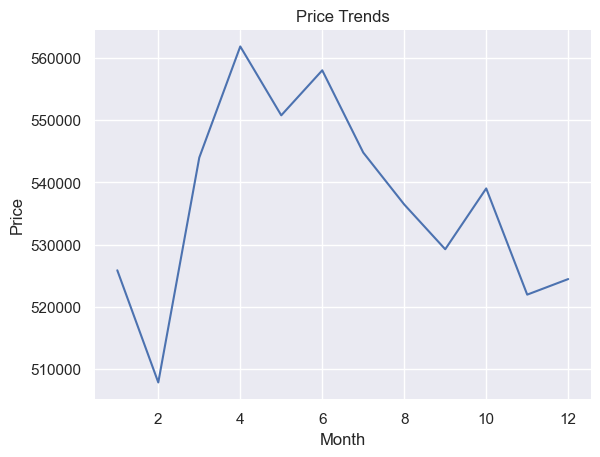

In [9]:
# Group by month and plot mean price
df.groupby('month').mean()['price'].plot()

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Price Trends')

# Remove spines
sns.despine(left=True, bottom=True)

# Display the plot
plt.show()

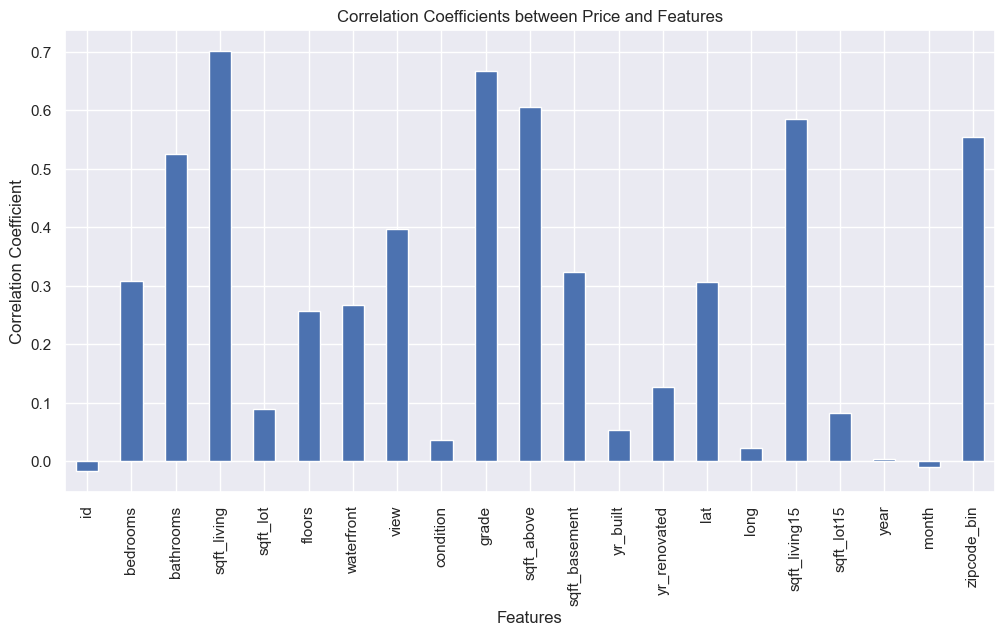

In [10]:
# Calculate the correlation coefficients between 'price' and all other features
price_correlations = df.corr()['price'].drop('price')

# Create a bar chart
plt.figure(figsize=(12, 6))
price_correlations.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation Coefficients between Price and Features')
plt.show()

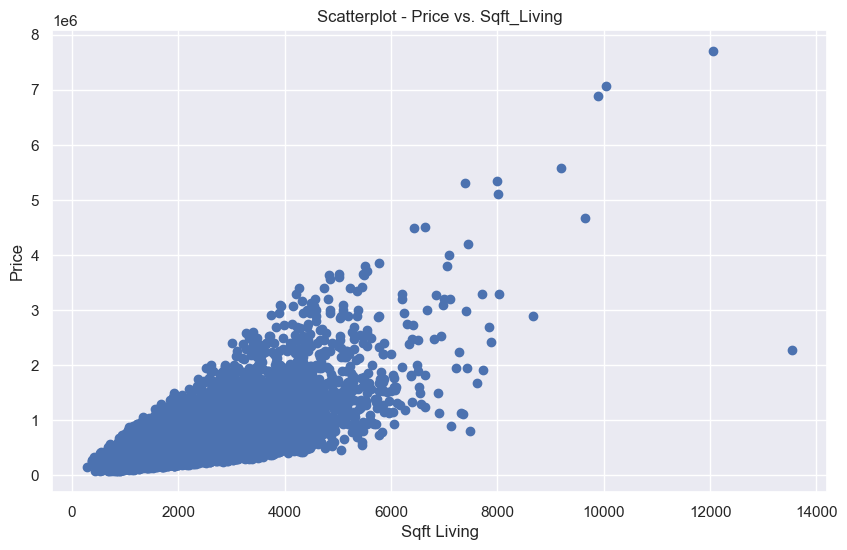

In [11]:
# Graph 2: Scatterplot - Price vs. Sqft_Living
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Scatterplot - Price vs. Sqft_Living')
plt.show()

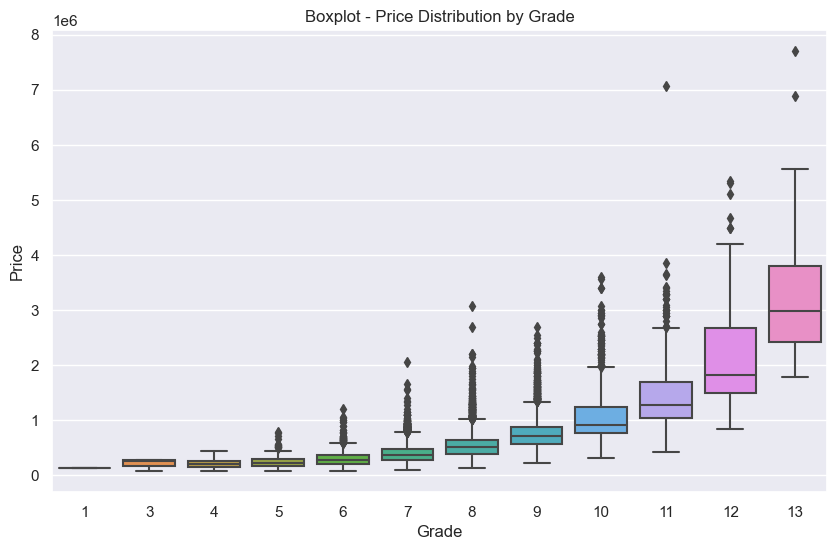

In [12]:
# Graph 3: Boxplot - Price Distribution by Grade
plt.figure(figsize=(10, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.title('Boxplot - Price Distribution by Grade')
plt.show()

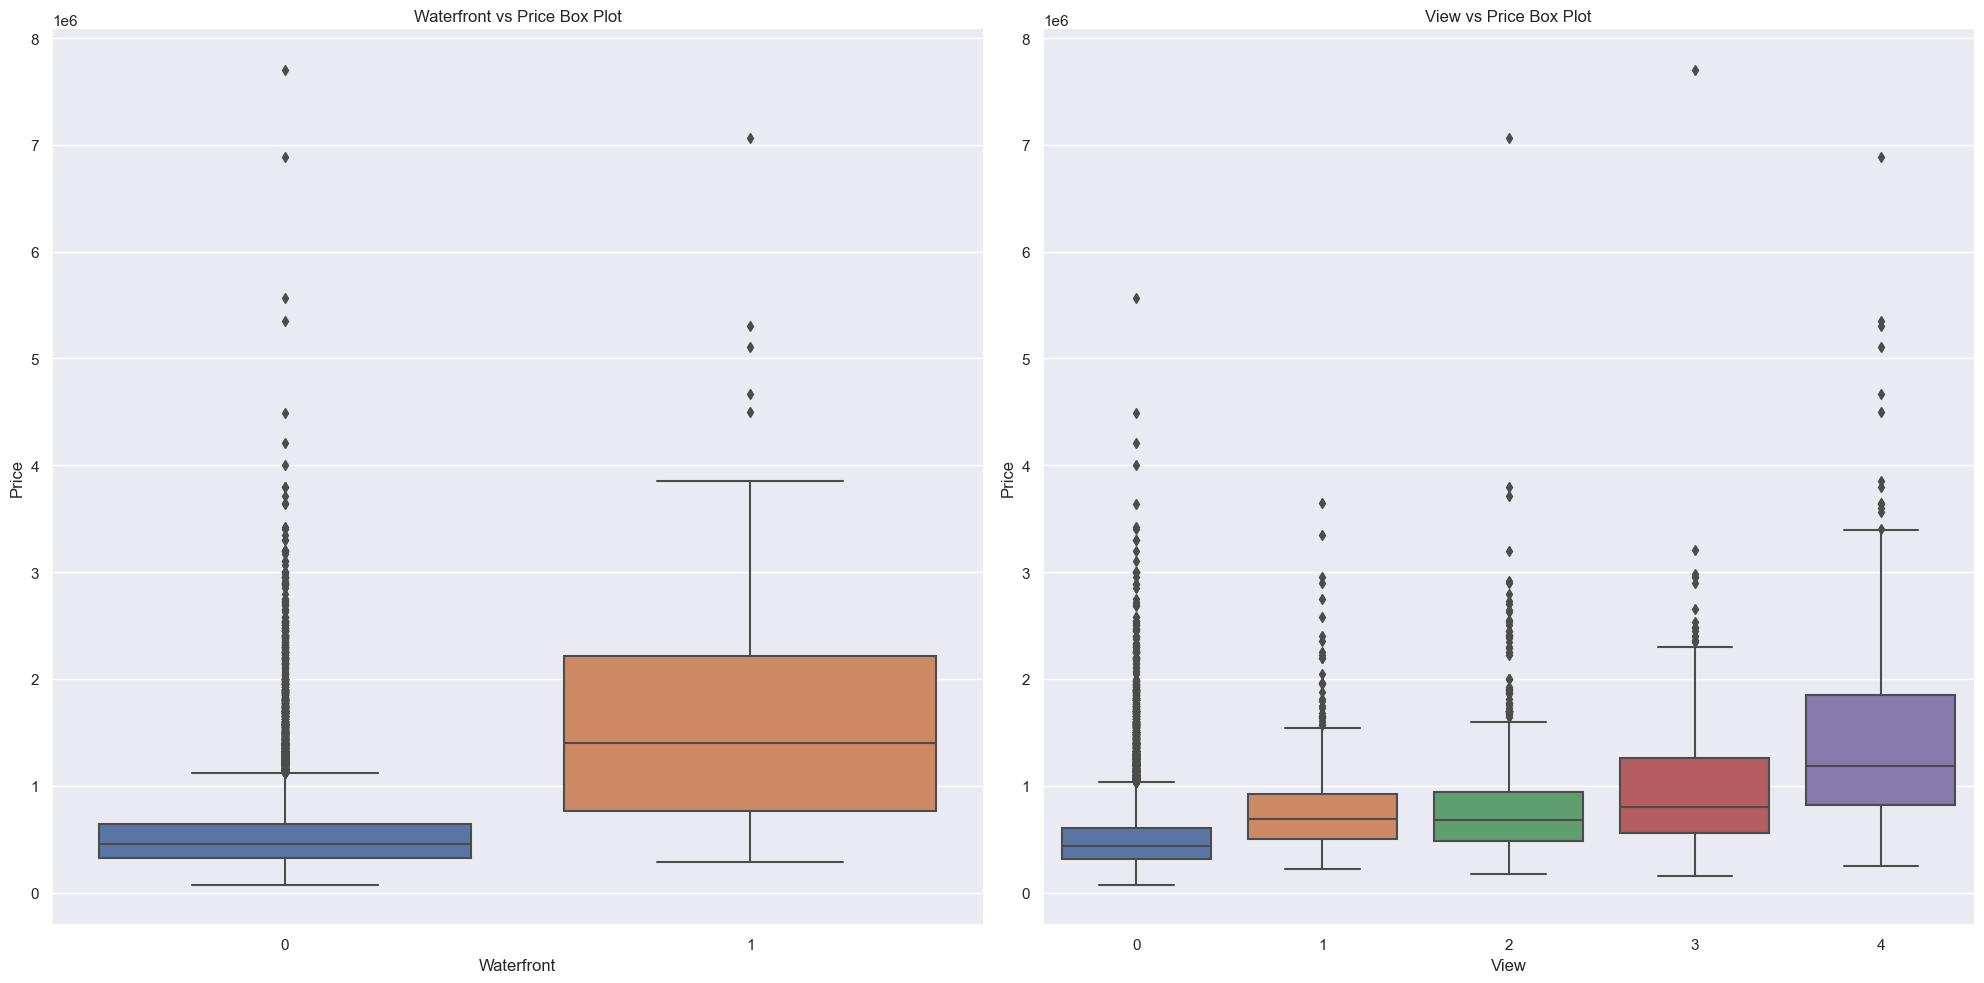

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Box plot for 'waterfront' vs 'price'
sns.boxplot(x='waterfront', y='price', data=df, ax=axes[0])
axes[0].set_title('Waterfront vs Price Box Plot')
axes[0].set_xlabel('Waterfront')
axes[0].set_ylabel('Price')

# Box plot for 'view' vs 'price'
sns.boxplot(x='view', y='price', data=df, ax=axes[1])
axes[1].set_title('View vs Price Box Plot')
axes[1].set_xlabel('View')
axes[1].set_ylabel('Price')

# Remove the top and right spines from all plots
for ax in axes:
    sns.despine(ax=ax)

# Display the plots
plt.tight_layout()
plt.show()


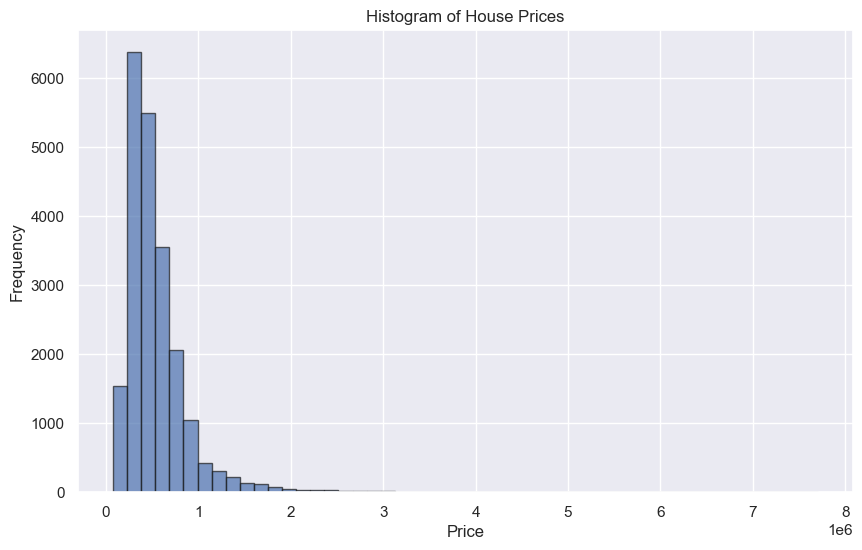

In [14]:
# Create a histogram for the 'price' column
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of House Prices')
plt.show()

From our graphical analysis, we have gained valuable insights into the relationships between various features and the target variable 'price.' These insights will be instrumental in guiding our feature selection and model building process.

Correlation Coefficients between Price and Features graph: The graph revealed that features such as 'bathrooms,' 'sqft_living,' 'grade,' 'sqft_above,' and 'sqft_living15' have a strong positive correlation (greater than 0.5) with the house price. On the other hand, 'condition,' 'sqft_lot,' and 'yr_built' have the lowest correlation coefficients. This information will help us identify the most important predictors for our model.

Scatterplot - Price vs. Sqft_Living: The scatterplot showed a positive linear relationship between 'price' and 'sqft_living,' along with numerous outliers for properties with living areas above 5,000 square feet. This observation suggests that we may need to address these outliers during data preprocessing.

Boxplot - Price Distribution by Grade: The boxplot revealed that the price range tends to widen as the grade increases. We might consider dividing the dataset into separate segments, such as standard and luxury properties, or removing some high-end properties from the analysis to improve the model's performance for typical homes.

Waterfront houses tends to have a better price value.
The price of waterfront houses tends to be more disperse and the price of houses without waterfront tend to be more concentrated.
Grade and waterfront effect price. View seem to effect less but it also has an effect on price.

Histogram of House Prices: The histogram indicated that the distribution of house prices is approximately normal for properties valued under 1 million, with the majority of properties falling within this range. This insight can help inform our modeling approach and validate the performance of our final model on the typical range of house prices.

In conclusion, our graphical analysis has provided a deeper understanding of the relationships between different features and house prices in King County. By leveraging these insights, we can make informed decisions during the feature selection and model building process, ultimately developing a more accurate and reliable model for predicting house prices.

In [15]:
# View data

df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [16]:
# Check for missing data in each column
missing_data = df.isnull().sum()

print("Missing data count for each column:")
print(missing_data)

Missing data count for each column:
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
zipcode_bin      0
dtype: int64


In [17]:
# Create feature and target variables
target = df['price']
features= df.drop('price', axis=1)

In [18]:
# Identify features with correlation coefficients less than 0.1
low_correlation_features = price_correlations[abs(price_correlations) < 0.1].index

# Drop the specified features from the dataset
features_filtered = features.drop(low_correlation_features, axis=1)

print(f"Number of features before dropping: {len(df.columns)}")
print(f"Number of features after dropping: {len(features_filtered.columns)}")

Number of features before dropping: 22
Number of features after dropping: 13


In [19]:
#View remaining columns
features_filtered.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15', 'zipcode_bin'],
      dtype='object')

Based on the correlation coefficients between the 'price' and other features, it is possible to identify the features with the lowest correlation to the target variable 'price'. Low correlation values indicate a weaker relationship with the target variable, and these features may not be as useful for predicting house prices.

In [20]:
# Remove 'lat' since that column is not useful
features_filtered = features_filtered.drop('lat', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Step 2: Split the dataset
# Separate the target variable ('price') from the input features
X = features_filtered
y = target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 17290
Testing set size: 4323


In [22]:
# Define scaler
scaler = MinMaxScaler()

# fit and transfrom
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

In [23]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Model selection
# Start with a simple Linear Regression model
ols = LinearRegression()

# Model building
# Fit the model to the training data
ols.fit(X_train_minmax, y_train)

# Make predictions on the test data
y_pred = ols.predict(X_test_minmax)

# Model evaluation
# Calculate and print MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('Variance Regression Score: ',explained_variance_score(y_test,y_pred))


Mean Absolute Error (MAE): 121178.18298275386
Mean Squared Error (MSE): 38490291583.424835
Root Mean Squared Error (RMSE): 196189.427807476
Variance Regression Score:  0.7244268855848384


Mean Absolute Error (MAE) is a measure of how far off our predictions are on average. An MAE of 121,178 means that on average, our model's predictions deviate from the actual prices by this amount. When compared to the mean price of 540,000, this error represents a relative error of about 22%, which may not be ideal depending on the accuracy requirements for your application. However, considering the broad range and potential variability in house prices, this may not be an altogether poor performance.

The variance regression score, or explained variance score, you've quoted as 0.78 means that 78% of the variance in our target variable (house prices) is captured by our model. This suggests that while our model isn't perfect, it's doing a reasonable job of capturing the trend in our data. A score of 1.0 would mean our model explains all the variance, which is typically not possible with real-world data.

The MSE represents the average of the squares of the errors, which means it measures the average squared difference between the estimated values and the actual value. In this case, an MSE of approximately 38,490,291,583 suggests that the model's predictions are, on average, quite different from the actual prices.

The RMSE, on the other hand, is a measure of the differences between values predicted by a model or an estimator and the values observed. It is simply the square root of the mean square error. The benefit of the RMSE is that it is expressed in the same units as the output, making interpretation easier. An RMSE of approximately 196,189 means that, on average, the model's predictions are about $196,189 off from the actual prices.

Considering the scale of house prices, these errors could be considered high, suggesting that there may be room for improvement in the model. We could try tuning the model's parameters, using a more complex model.

It's also worth noting that if there are some particularly high-priced houses in the dataset, these could be influencing the high MSE and RMSE, since these metrics are sensitive to outliers. It might be worth exploring the data further to check for the presence of such outliers and consider appropriate handling of them.



There are some houses with extra luxuries or in very poor conditions might effect our prediction models, we should consider removing some outliers in each grade to avoid this situation.

The majority of housing prices fall within the range of 0 to 1,500,000. On average, houses are priced at around 540,000. It is worth considering excluding extreme values. For example, we can concentrate on houses priced between 0 and 3,000,000 and disregard the rest.

There appears to be a favorable linear correlation between the price and the square footage of the living area. In general, an expansion in living space tends to correspond to an increase in the price of a house.

In [24]:
# Calculate the IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

Number of rows before removing outliers: 21613
Number of rows after removing outliers: 20467


In [25]:
# Preview price
df_no_outliers['price'].describe()

count    2.046700e+04
mean     4.769846e+05
std      2.083713e+05
min      7.500000e+04
25%      3.150000e+05
50%      4.375000e+05
75%      6.000000e+05
max      1.127500e+06
Name: price, dtype: float64

In [26]:
# Create pipline to decide which is the best scaler
# Define the pipeline
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('model', LinearRegression())])

# Define the parameter grid
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
}

# Initialize the grid search
grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid.fit(X_train, y_train)

# Get the best parameters
print('Best parameters:', grid.best_params_)


Best parameters: {'scaler': RobustScaler()}


In [27]:
# Separate the target variable ('price') from the input features
X = df_no_outliers[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat',
       'sqft_living15', 'zipcode_bin']]
y = df_no_outliers['price']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 16373
Testing set size: 4094


Retrain the model with RobustScaler and new dataset with no outliers

In [28]:
# Define scaler
scaler = RobustScaler()

# fit and transfrom
X_train_ols = scaler.fit_transform(X_train)
X_test_ols = scaler.transform(X_test)

In [31]:
# Start with a simple Linear Regression model
ols = LinearRegression()

# Model building
# Fit the model to the training data
ols.fit(X_train_ols, y_train)

# Make predictions on the test data
y_pred_ols = ols.predict(X_test_ols)

# Model evaluation
# Calculate and print MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred_ols)
mse = mean_squared_error(y_test, y_pred_ols)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('Variance Regression Score: ',explained_variance_score(y_test,y_pred_ols))

Mean Absolute Error (MAE): 75062.32644144859
Mean Squared Error (MSE): 10134413270.062012
Root Mean Squared Error (RMSE): 100669.82303581353
Variance Regression Score:  0.768722868405159


There is an improvement in new model but it is still far off from the original price. We can try to transform the target price or using other models to compare the results

In [32]:
# Define a pipeline
pipe_rf = Pipeline([('scaler', RobustScaler()),
                 ('model', RandomForestRegressor(random_state=2))])

# Define the hyperparameters for GridSearch
param_grid_rf = {'model__n_estimators': [100, 200, 300],
              'model__max_depth': [None, 5, 10],
              'model__min_samples_split': [2, 5, 10]}

# Initialize GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_rf.best_params_)

# Predict on the test data
y_pred_rf = grid_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('Variance Regression Score: ',explained_variance_score(y_test, y_pred_rf))


Best parameters:  {'model__max_depth': None, 'model__min_samples_split': 10, 'model__n_estimators': 300}
Mean Absolute Error (MAE): 60457.46584479031
Mean Squared Error (MSE): 7299262950.940216
Root Mean Squared Error (RMSE): 85435.72409092239
Variance Regression Score:  0.8333592552489569


Consider expanding the range of hyperparameters that I am searching over, or using a more advanced form of hyperparameter optimization, like Bayesian Optimization.

In [34]:
from skopt import BayesSearchCV

# Define a pipeline
pipe_rf = Pipeline([('scaler', RobustScaler()),
                 ('model', RandomForestRegressor(random_state=2))])

# Define the hyperparameters for BayesSearch
param_space_rf = {'model__n_estimators': (50, 500),
              'model__max_depth': (None, 5, 15),
              'model__min_samples_split': (2, 5, 10)}

# Initialize BayesSearchCV
bayes_rf = BayesSearchCV(pipe_rf, param_space_rf, cv=5, n_jobs=-1, n_iter=50)

# Fit BayesSearchCV
bayes_rf.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", bayes_rf.best_params_)

# Predict on the test data
y_pred_rf = bayes_rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('Variance Regression Score: ',explained_variance_score(y_test, y_pred_rf))


Best parameters:  OrderedDict([('model__max_depth', None), ('model__min_samples_split', 5), ('model__n_estimators', 500)])
Mean Absolute Error (MAE): 60312.21732560891
Mean Squared Error (MSE): 7301874581.055775
Root Mean Squared Error (RMSE): 85451.00690486786
Variance Regression Score:  0.8333005465358895


Use a Neural Network for this regression problem. Creates a simple neural network with one hidden layer of 13 neurons (assuming you have 13 features, adjust according to your dataset) and a single output neuron for the regression problem.
The model is compiled with the 'adam' optimizer and the mean squared error loss function, which is a standard for regression problems.
The model is then trained for 50 epochs with a batch size of 5.

In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred_nn = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_nn)
mse = mean_squared_error(y_test, y_pred_nn)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('Variance Regression Score: ',explained_variance_score(y_test, y_pred_nn))


Mean Absolute Error (MAE): 148526.70102777
Mean Squared Error (MSE): 34385055703.85346
Root Mean Squared Error (RMSE): 185432.07841108146
Variance Regression Score:  0.35723002635911016


Use the K-nearest neighbors (KNN) regression model. We'll use a pipeline and grid search for hyperparameter tuning as before. We're searching over a few different options for the hyperparameters. The number of neighbors to consider (n_neighbors) is one of the most important settings for KNN. Similarly, the choice of distance metric and whether to weight points by their distance can have a significant impact on performance.

In [36]:
from sklearn.neighbors import KNeighborsRegressor

# Define a pipeline
pipe_knn = Pipeline([('scaler', RobustScaler()),
                 ('model', KNeighborsRegressor())])

# Define the hyperparameters for GridSearch
param_grid_knn = {'model__n_neighbors': [3, 5, 7, 10],
              'model__weights': ['uniform', 'distance'],
              'model__metric': ['euclidean', 'manhattan']}

# Initialize GridSearchCV
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1)

# Fit GridSearchCV
grid_knn.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_knn.best_params_)

# Predict on the test data
y_pred_knn = grid_knn.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print('Variance Regression Score: ',explained_variance_score(y_test, y_pred_knn))


Best parameters:  {'model__metric': 'manhattan', 'model__n_neighbors': 10, 'model__weights': 'distance'}
Mean Absolute Error (MAE): 65886.30536615435
Mean Squared Error (MSE): 8779952778.616392
Root Mean Squared Error (RMSE): 93701.40222331996
Variance Regression Score:  0.800280813270919



In conclusion, our exploration of various models to predict house prices provided valuable insights but highlighted the necessity for further model refinement. The analysis confirmed that a range of features influences housing pricesour goal in this project was to develop a model capable of predicting housing prices based on a variety of features, including house size, location, and condition., with our most successful model being a Random Forest model. However, given the high degree of prediction errors, this model isn't ready for real-world deployment.

After implementing and testing various models such as OLS, Random Forest Regressor, Neural Networks, and K-nearest Neighbors, the Random Forest model performed best, showing the least mean absolute error, mean squared error, and root mean squared error, along with the highest variance regression score. However, the model's error values still represent a significant amount of the actual house prices, which have a mean of 476,984 and standard deviation of 208,371, suggesting that there's room for improvement.

To enhance predictive performance, my recommendation is to conduct a more thorough feature engineering and selection process, potentially introducing additional influential data. Advanced models or an ensemble of models could help better encapsulate the relationships in the data. Further tuning of hyperparameters in our existing models, particularly the Random Forest model, may yield improved results as well.

We also identified potential challenges and opportunities. Accurately capturing the complexity of the real estate market, managing outliers, and ensuring generalizability to unseen data present considerable challenges. However, the opportunities are equally significant. Exploring more complex models, such as ensemble models or deep learning models, and incorporating external factors like economic indicators or neighborhood characteristics could improve the predictive capability of our model substantially.

Overall, our current best model, the Random Forest, is a good starting point but not yet ready for deployment. To ready it for production, we'd need to enhance the model's performance to ensure that the predictions are reliable and useful in a real-world scenario. Future work should therefore focus on improving prediction accuracy and generalizability, which would bring us closer to our ultimate goal of providing accurate housing price predictions.